In [7]:
from PIL import Image
from ultralytics import YOLO
import json
import matplotlib.pyplot as plt
import os
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.25 🚀 Python-3.11.7 torch-2.3.1 CPU (Apple M1 Pro)
Setup complete ✅ (10 CPUs, 16.0 GB RAM, 696.6/926.4 GB disk)


In [ ]:
with open('../config.json') as f:
    config = json.load(f)
BASE_DIR = config["BASE_DIR_SEG_MAC"]

In [10]:
YAML_FILE = os.path.join(BASE_DIR, '/scape.v4i.yolov8_70-20-10/data.yaml')

In [ ]:
yolo_models: dict = {
    'yolov8 nano'       : os.path.join(BASE_DIR, 'scape.v4i.yolov9_70-20-10/200_70-20-10_split/yolov8 nano_exp/weights/epoch16.pt'),
    'yolov8 small'      : os.path.join(BASE_DIR, 'scape.v4i.yolov9_70-20-10/200_70-20-10_split/yolov8 small_exp/weights/epoch14.pt',),
    'yolov8 medium'     : os.path.join(BASE_DIR, 'scape.v4i.yolov9_70-20-10/200_70-20-10_split/yolov8 medium_exp/weights/epoch35.pt',),
    'yolov8 large'      : os.path.join(BASE_DIR, 'scape.v4i.yolov9_70-20-10/200_70-20-10_split/yolov8 large_exp/weights/epoch61.pt',),
    'yolov8 xlarge'     : os.path.join(BASE_DIR, 'scape.v4i.yolov9_70-20-10/200_70-20-10_split/yolov8 xlarge_exp/weights/epoch74.pt',),
    'yolov9 c'          : os.path.join(BASE_DIR, 'scape.v4i.yolov9_70-20-10/200_70-20-10_split/yolov9 c_exp/weights/epoch49.pt',),
}
# print(yolo_models.get('yolov8 nano'))

In [12]:
image_path = os.path.join(BASE_DIR, 'scape.v4i.yolov8_70-20-10/test/images')
images = [os.path.join(BASE_DIR,image_path,img) for img in os.listdir(image_path) if img.endswith(".jpg")]

In [ ]:
model = YOLO(yolo_models.get('yolov9 c'))

results = model.predict(images)

In [ ]:
for i, r in enumerate(results):
    im_bgr = r.plot()
    im_rgb = Image.fromarray(im_bgr[..., ::-1])

    r.show()

    # Save results to disk
    # r.save(filename=f"results{i}.jpg")

In [ ]:
for enum, result in enumerate(results):
    output_file = os.path.join(BASE_DIR, 'scape.v4i.yolov9_70-20-10/200_70-20-10_split_test/results/yolov8 nano', f"results{enum}.jpg")
    print(output_file)
    result.save(
        filename = output_file
        )

In [ ]:
for enum, result in enumerate(results):
    plt.imshow(result.plot(boxes=False))
    plt.imsave(os.path.join(BASE_DIR, '200_70-20-10_split_test/results/yolov9 c', f"results{enum}.jpg"), result.plot(boxes=False))

In [ ]:
plt.imshow(results[0].plot(boxes=False))

In [ ]:
yolov8_nano_path    = os.path.join(BASE_DIR, 'scape.v4i.yolov9_70-20-10/200_70-20-10_split_test/results/yolov8 nano')
yolov8_small_path   = os.path.join(BASE_DIR, 'scape.v4i.yolov9_70-20-10/200_70-20-10_split_test/results/yolov8 small')
yolov8_medium_path  = os.path.join(BASE_DIR, 'scape.v4i.yolov9_70-20-10/200_70-20-10_split_test/results/yolov8 medium')
yolov8_large_path   = os.path.join(BASE_DIR, 'scape.v4i.yolov9_70-20-10/200_70-20-10_split_test/results/yolov8 large')
yolov8_xlarge_path  = os.path.join(BASE_DIR, 'scape.v4i.yolov9_70-20-10/200_70-20-10_split_test/results/yolov8 xlarge')
yolov9_c_path       = os.path.join(BASE_DIR, 'scape.v4i.yolov9_70-20-10/200_70-20-10_split_test/results/yolov9 c')

yolov8_nano_images = [os.path.join(yolov8_nano_path, img) for img in os.listdir(yolov8_nano_path) if img.endswith(".jpg")]
yolov8_small_images = [os.path.join(yolov8_small_path, img) for img in os.listdir(yolov8_small_path) if img.endswith(".jpg")]
yolov8_medium_images = [os.path.join(yolov8_medium_path, img) for img in os.listdir(yolov8_medium_path) if img.endswith(".jpg")]
yolov8_large_images = [os.path.join(yolov8_large_path, img) for img in os.listdir(yolov8_large_path) if img.endswith(".jpg")]
yolov8_xlarge_images = [os.path.join(yolov8_xlarge_path, img) for img in os.listdir(yolov8_xlarge_path) if img.endswith(".jpg")]
yolov9_c_images = [os.path.join(yolov9_c_path, img) for img in os.listdir(yolov9_c_path) if img.endswith(".jpg")]


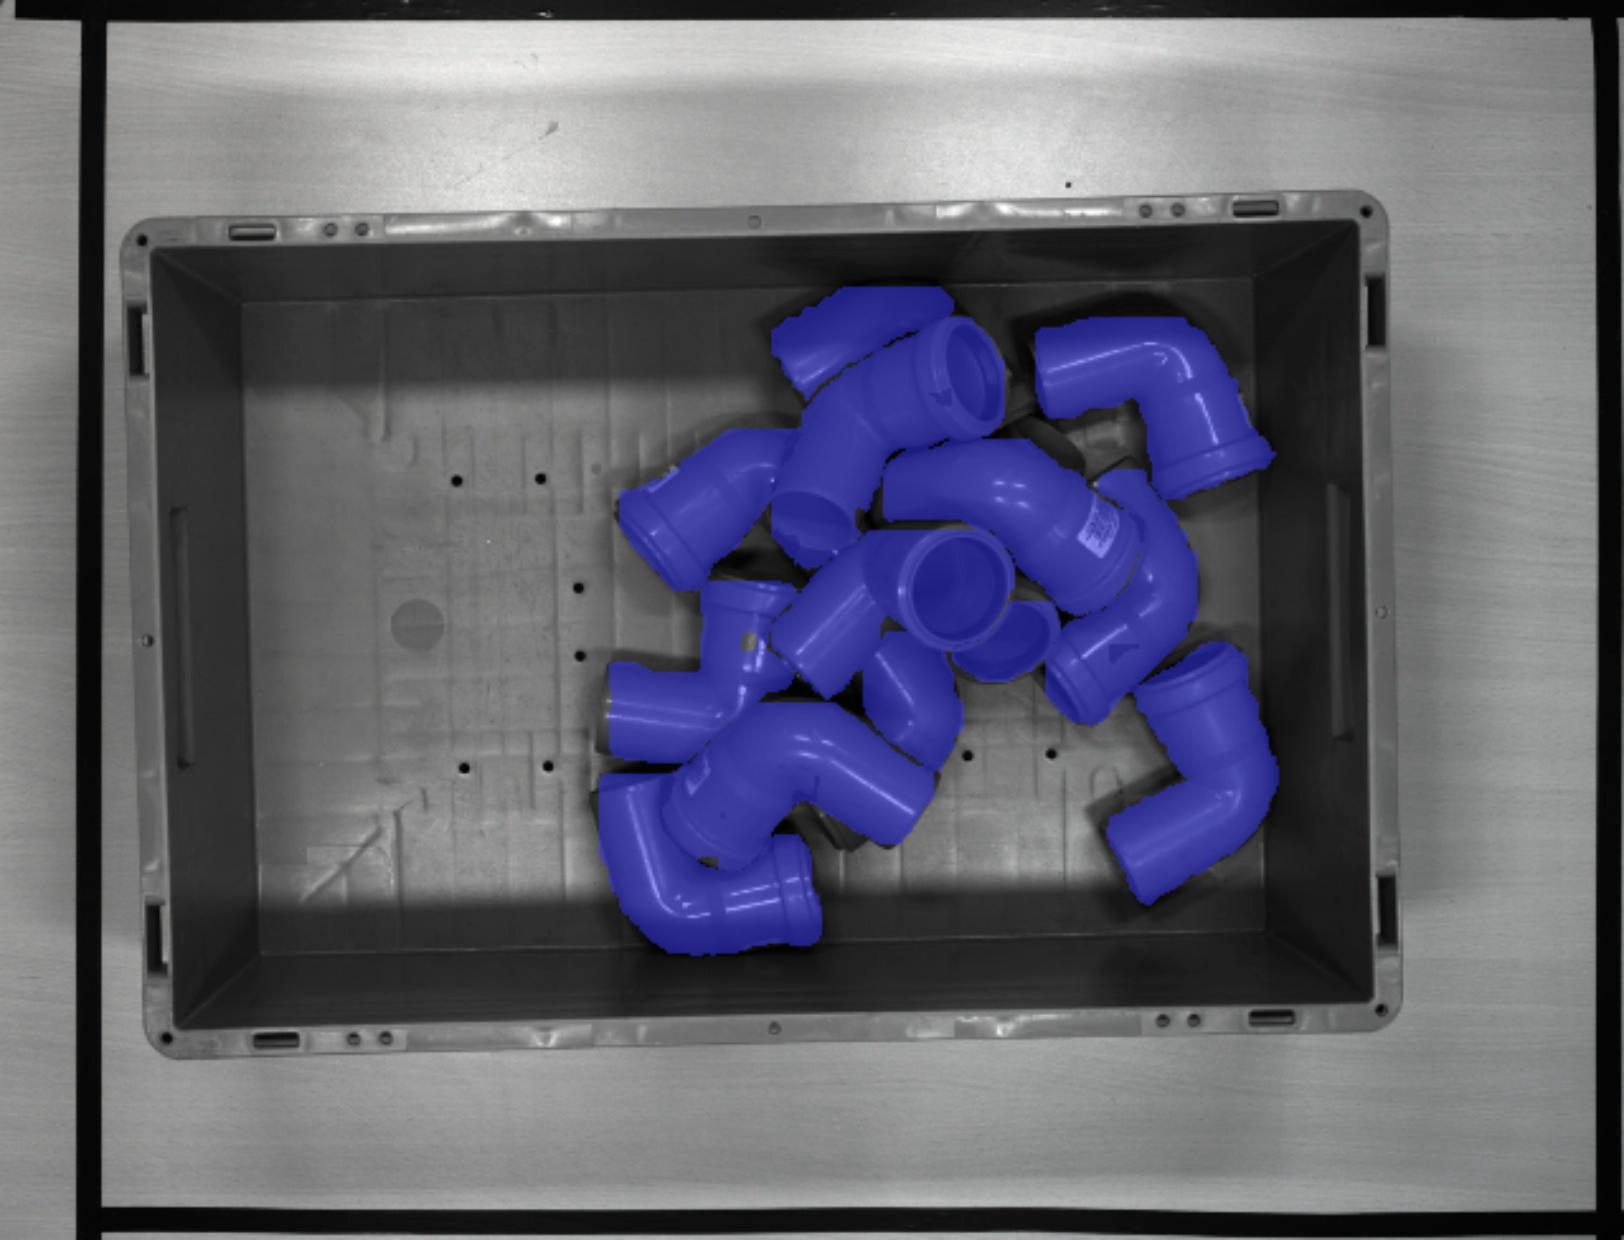

In [ ]:
Image.open(yolov8_nano_images[0])

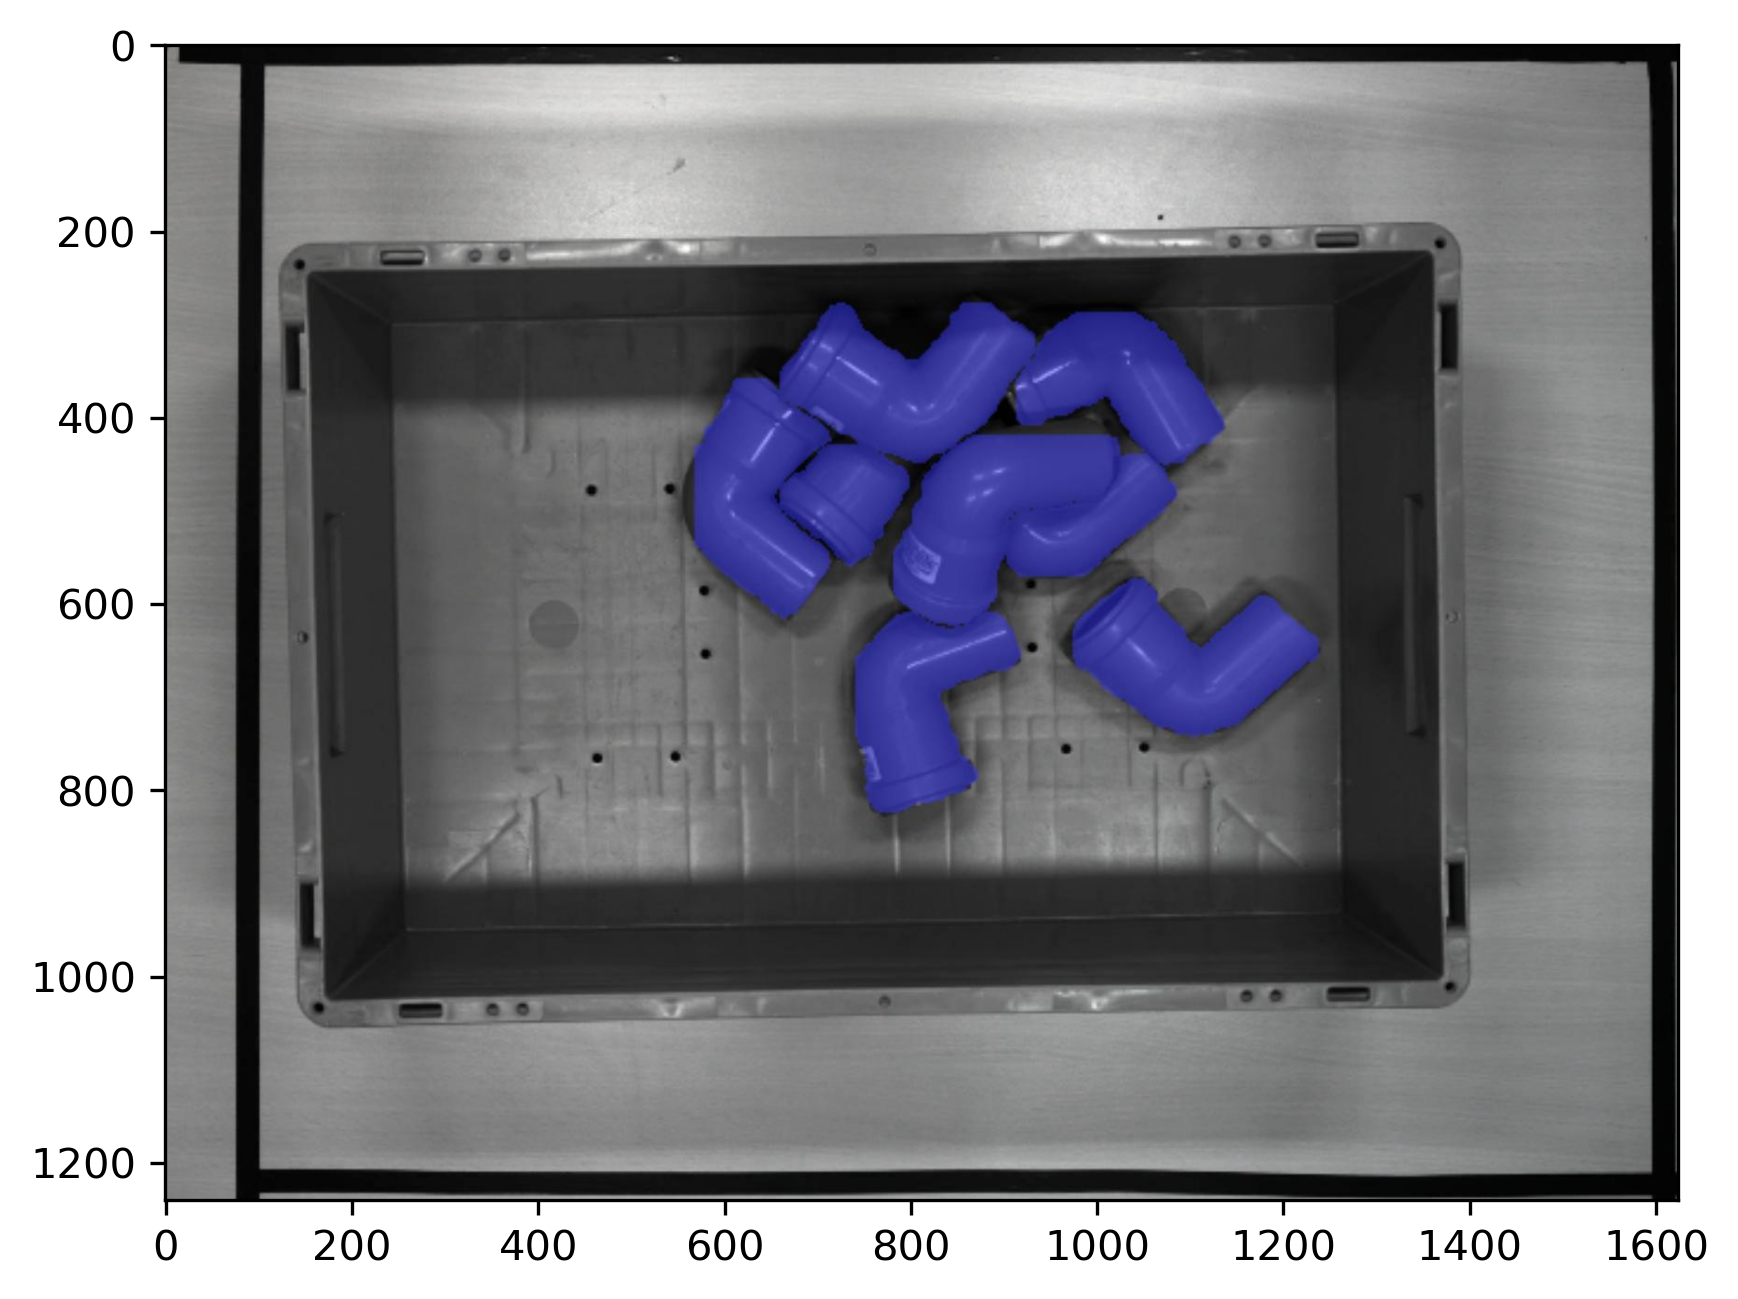

In [36]:
plt.figure(figsize=(10,5), dpi=300)
plt.imshow(np.array(Image.open(yolov8_nano_images[111])))

In [ ]:
def plot_images_in_grid(image_paths, nrows, ncols):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 15))
    axes = axes.ravel()
    
    for ax, img_path in zip(axes, image_paths):
        try:
            if os.path.isfile(img_path) and img_path.endswith('.jpg'):
                img = Image.open(img_path)
                ax.imshow(img)
                ax.set_title(os.path.basename(os.path.dirname(img_path)))
            else:
                ax.set_title("Not a valid image file")
            ax.axis('off')
        except Exception as e:
            print(f"Failed to load image {img_path}: {e}")
            ax.set_title("Failed to load image")

    plt.tight_layout()
    plt.show()

all_images = [
    yolov8_nano_images[:5], yolov8_small_images[:5], yolov8_medium_images[:5],
    yolov8_large_images[:5], yolov8_xlarge_images[:5], yolov9_c_images[:5]
]

flat_list = [item for sublist in all_images for item in sublist]

plot_images_in_grid(flat_list, nrows=6, ncols=5)

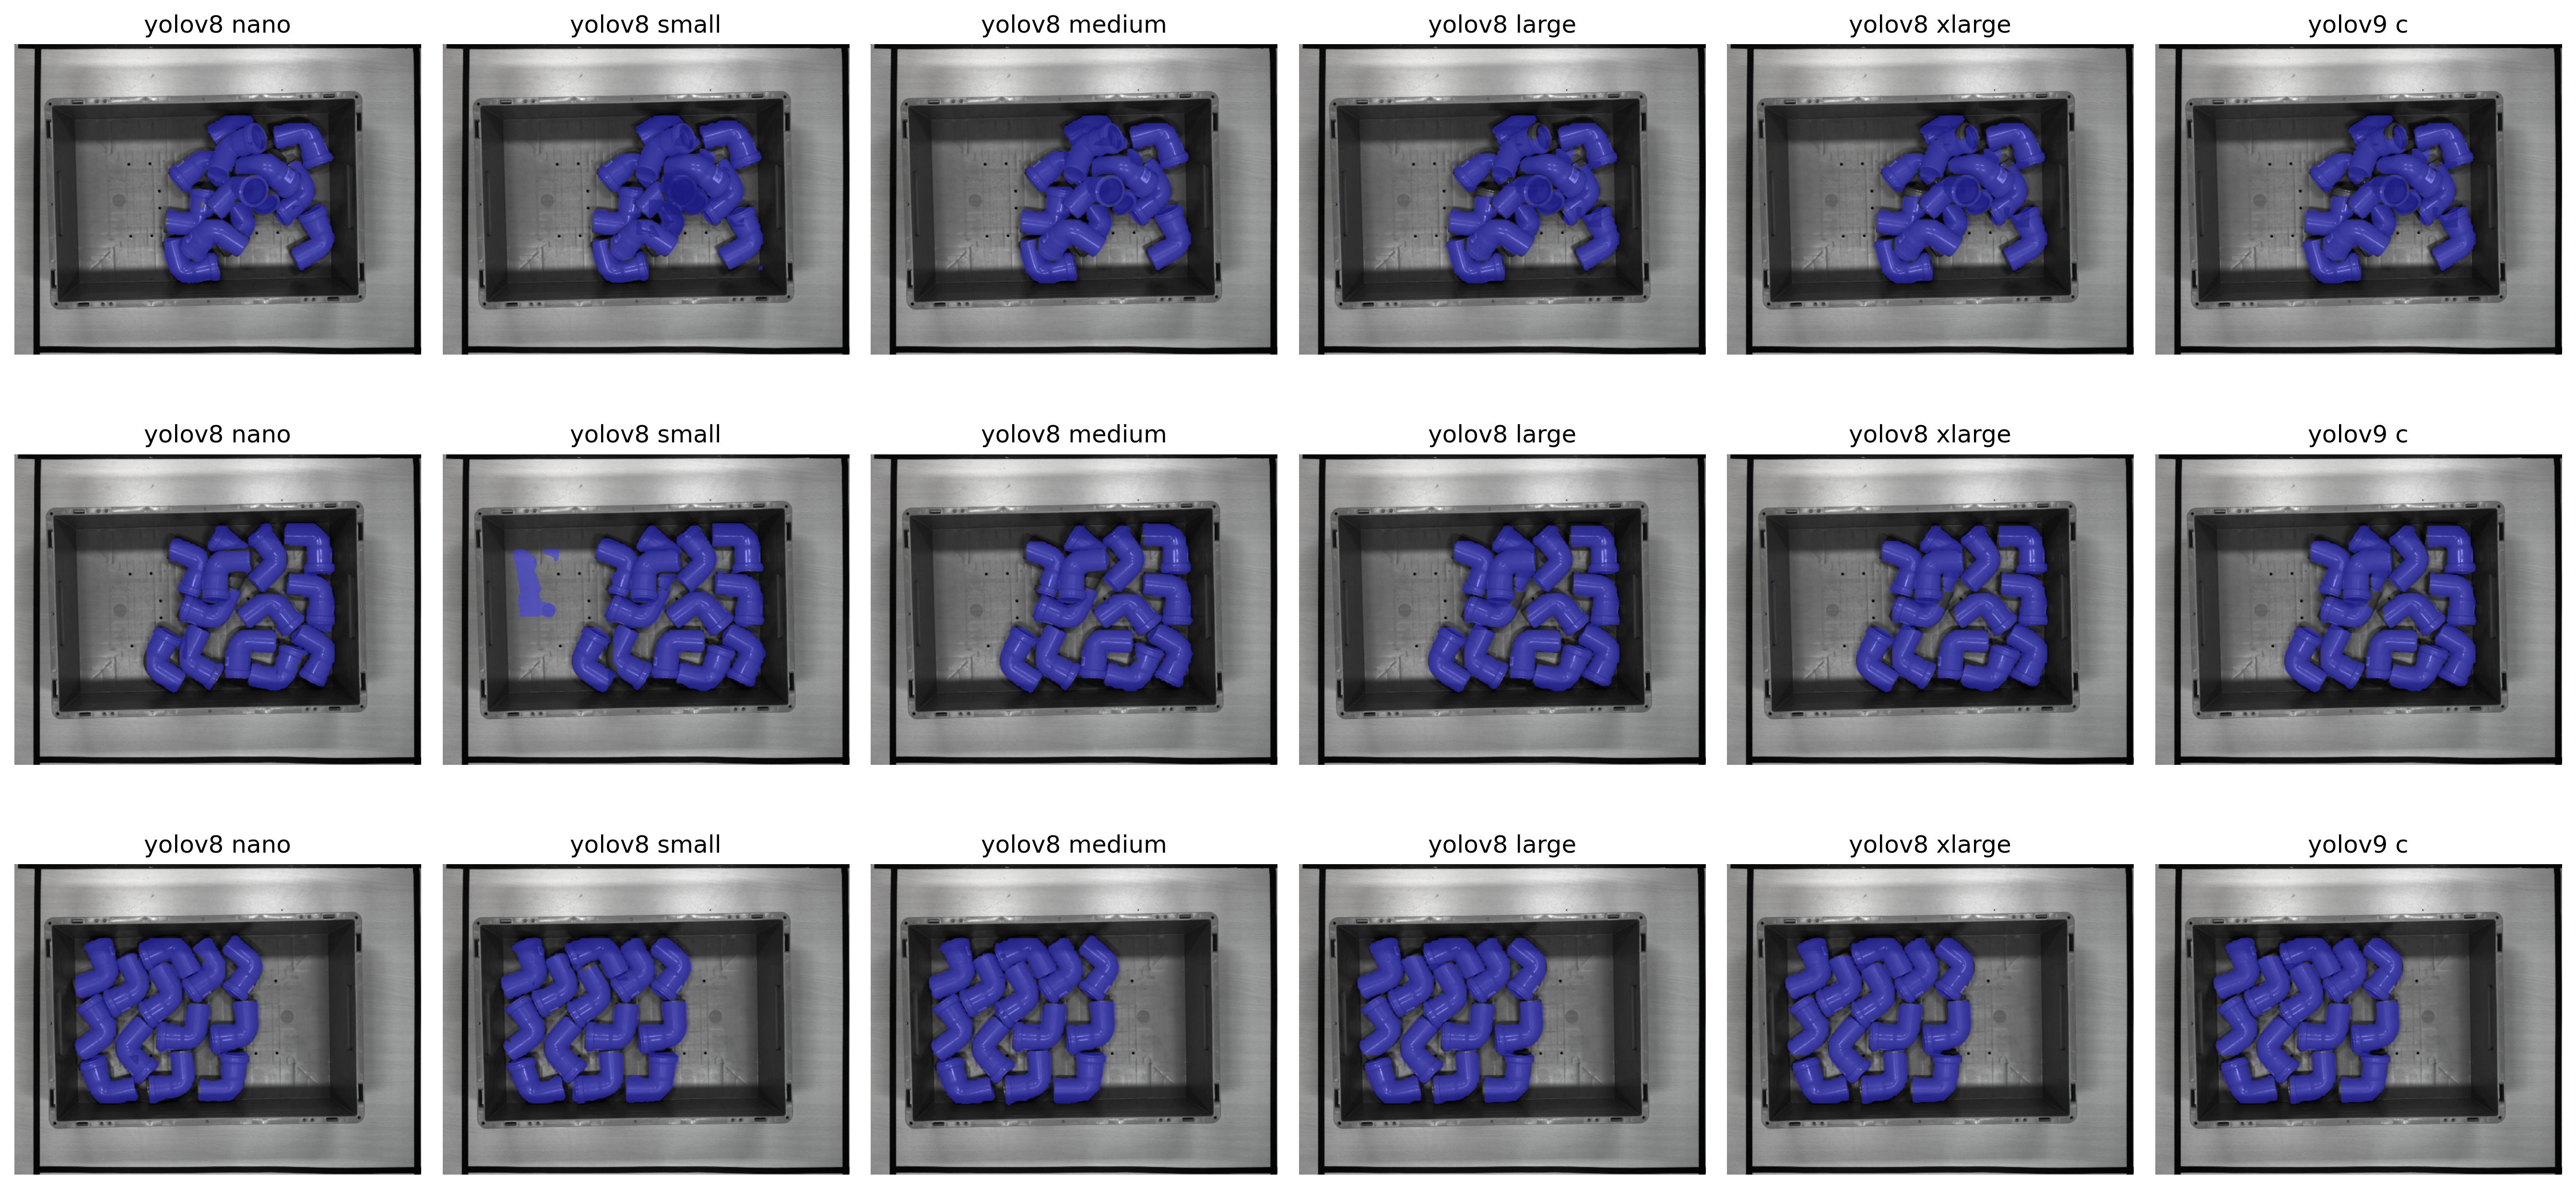

In [ ]:
# TRANSPOSED GRID

def plot_images_in_grid(image_paths, nrows, ncols):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 9), dpi = 300)
    axes = axes.ravel()

    for ax, img_path in zip(axes, image_paths):
        try:
            if os.path.isfile(img_path) and img_path.endswith('.jpg'):
                img = Image.open(img_path)
                ax.imshow(img)
                ax.set_title(os.path.basename(os.path.dirname(img_path)))
            else:
                ax.set_title("Not a valid image file")
            ax.axis('off')
        except Exception as e:
            print(f"Failed to load image {img_path}: {e}")
            ax.set_title("Failed to load image")

    plt.tight_layout()
    plt.show()

all_images = [
    yolov8_nano_images[:5], yolov8_small_images[:5], yolov8_medium_images[:5],
    yolov8_large_images[:5], yolov8_xlarge_images[:5], yolov9_c_images[:5]
]

transposed_list = [img for sublist in zip(*all_images) for img in sublist]

# Plot the images
plot_images_in_grid(transposed_list, nrows=3, ncols=6)
